In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('./data/sales_train.csv')

In [4]:
data.dtypes

unique_id            int64
date                object
warehouse           object
total_orders       float64
sales              float64
sell_price_main    float64
availability       float64
type_0_discount    float64
type_1_discount    float64
type_2_discount    float64
type_3_discount    float64
type_4_discount    float64
type_5_discount    float64
type_6_discount    float64
dtype: object

In [5]:
data['date'] = pd.to_datetime(data['date'])
data['unique_id'] = data['unique_id'].astype('category')
data['warehouse'] = data['warehouse'].astype('category')
data = data.drop('availability', axis=1)

In [6]:
data['warehouse'].value_counts()

warehouse
Prague_1       780566
Prague_3       779655
Prague_2       770709
Brno_1         643637
Budapest_1     574582
Munich_1       259333
Frankfurt_1    198937
Name: count, dtype: int64

In [7]:
data.isna().sum()

unique_id           0
date                0
warehouse           0
total_orders       52
sales              52
sell_price_main     0
type_0_discount     0
type_1_discount     0
type_2_discount     0
type_3_discount     0
type_4_discount     0
type_5_discount     0
type_6_discount     0
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.describe()

,date,total_orders,sales,sell_price_main,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
count,4007367,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06
mean,2022-09-17 11:52:27.934592,5.995722e+03,1.083808e+02,1.814222e+02,8.518080e-03,1.240915e-04,1.163208e-03,5.452890e-06,5.680252e-03,4.049758e-04,1.045494e-02
min,2020-08-01 00:00:00,4.580000e+02,0.000000e+00,2.000000e-02,-2.094930e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.712000e-02,0.000000e+00,-8.014900e-01
25%,2021-11-09 00:00:00,4.402000e+03,1.798000e+01,2.113000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2022-10-23 00:00:00,5.515000e+03,3.952000e+01,4.564000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2023-08-17 00:00:00,8.011000e+03,9.447000e+01,1.121300e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2024-06-02 00:00:00,1.847500e+04,2.631619e+04,2.168299e+04,9.916400e-01,5.000000e-01,7.637200e-01,2.506300e-01,4.529000e-01,6.691400e-01,9.000500e-01
std,NaN,2.479598e+03,3.603327e+02,4.611040e+02,5.146927e-02,5.142848e-03,1.879989e-02,8.922494e-04,2.892983e-02,9.199973e-03,5.545069e-02


In [10]:
discounts = [f'type_{i}_discount' for i in range(7)]
for discount in discounts:
    data.loc[data[discount] < 0, discount] = 0

In [11]:
data.describe()

,date,total_orders,sales,sell_price_main,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
count,4007367,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06,4.007367e+06
mean,2022-09-17 11:52:27.934592,5.995722e+03,1.083808e+02,1.814222e+02,8.532168e-03,1.240915e-04,1.163208e-03,5.452890e-06,5.680263e-03,4.049758e-04,1.045540e-02
min,2020-08-01 00:00:00,4.580000e+02,0.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2021-11-09 00:00:00,4.402000e+03,1.798000e+01,2.113000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2022-10-23 00:00:00,5.515000e+03,3.952000e+01,4.564000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2023-08-17 00:00:00,8.011000e+03,9.447000e+01,1.121300e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2024-06-02 00:00:00,1.847500e+04,2.631619e+04,2.168299e+04,9.916400e-01,5.000000e-01,7.637200e-01,2.506300e-01,4.529000e-01,6.691400e-01,9.000500e-01
std,NaN,2.479598e+03,3.603327e+02,4.611040e+02,4.893685e-02,5.142848e-03,1.879989e-02,8.922494e-04,2.892982e-02,9.199973e-03,5.544819e-02


<Axes: title={'center': 'total sales'}, xlabel='date'>

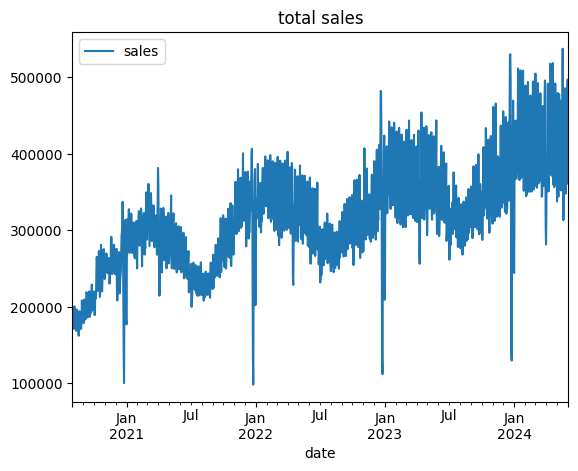

In [12]:
total = data[['date', 'sales']].groupby('date').sum().reset_index()
total.plot(x='date', y='sales', kind='line', title='total sales')

<Axes: title={'center': 'total price-weighted sales'}, xlabel='date'>

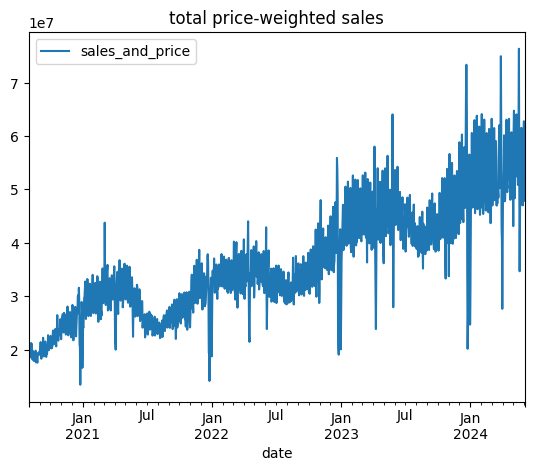

In [13]:
data['sales_and_price'] = data['sales'] * data['sell_price_main']
total = data[['date', 'sales_and_price']].groupby('date').sum().reset_index()
total.plot(x='date', y='sales_and_price', kind='line', title='total price-weighted sales')

<Axes: title={'center': 'sum sqrt (sales * price)'}, xlabel='date'>

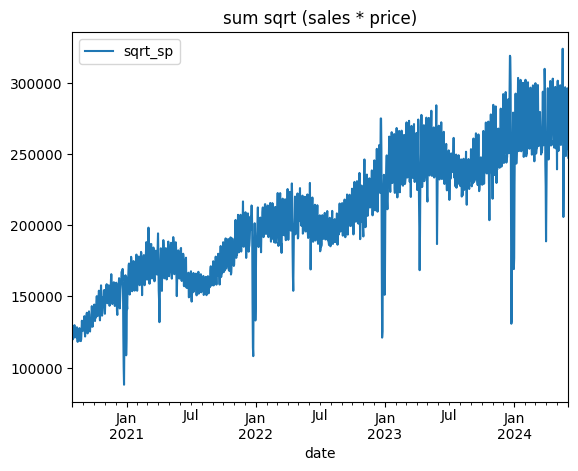

In [14]:

data['sqrt_sp'] = np.sqrt(data['sales_and_price'])
total = data[['date', 'sqrt_sp']].groupby('date').sum().reset_index()
total.plot(x='date', y='sqrt_sp', kind='line',
           title='sum sqrt (sales * price)')

# Weight - Price EDA

In [15]:
weights = pd.read_csv('./data/test_weights.csv')
eda = pd.read_csv('./data/sales_train.csv')

eda = eda.sort_values(['unique_id', 'date'], axis=0)
last_date = eda[['unique_id', 'date']].groupby(['unique_id']).last().reset_index().drop_duplicates()
last = last_date.merge(weights, how='left', on = 'unique_id')
last = last.merge(eda, how='left', on=['unique_id', 'date']).dropna(axis=0)
last

,unique_id,date,weight,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,0,2023-07-28,2.535369,Budapest_1,5621.0,66.71,853.20,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2024-06-02,3.888933,Frankfurt_1,1204.0,206.75,2.87,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2024-06-02,5.885237,Munich_1,2962.0,405.00,3.34,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2024-06-02,2.139552,Budapest_1,6088.0,78.60,702.89,0.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2023-06-26,3.021715,Frankfurt_1,1529.0,68.59,2.23,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5385,5427,2024-06-02,1.690246,Budapest_1,6143.0,31.77,555.72,0.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5386,5428,2024-06-02,9.003782,Brno_1,8091.0,12.05,149.62,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5387,5429,2024-06-02,14.505492,Prague_1,9940.0,12.76,213.60,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5388,5430,2024-06-02,6.964847,Prague_3,5177.0,8.23,219.83,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


warehouse
Brno_1         [Axes(0.125,0.11;0.775x0.77)]
Budapest_1     [Axes(0.125,0.11;0.775x0.77)]
Frankfurt_1    [Axes(0.125,0.11;0.775x0.77)]
Munich_1       [Axes(0.125,0.11;0.775x0.77)]
Prague_1       [Axes(0.125,0.11;0.775x0.77)]
Prague_2       [Axes(0.125,0.11;0.775x0.77)]
Prague_3       [Axes(0.125,0.11;0.775x0.77)]
dtype: object

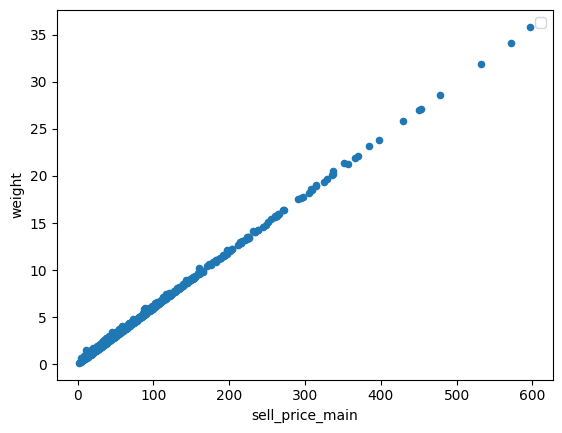

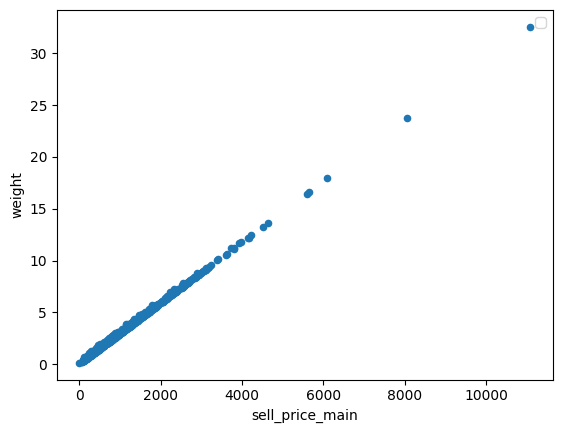

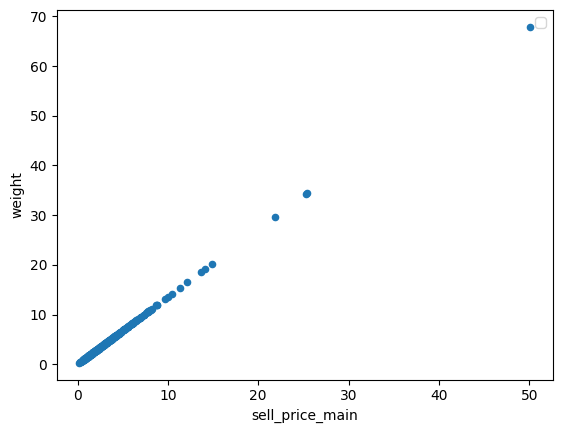

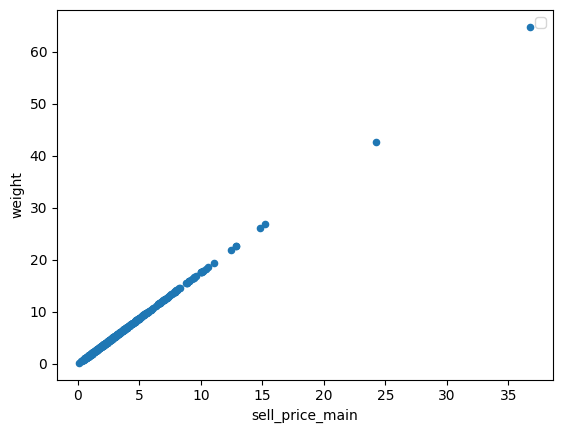

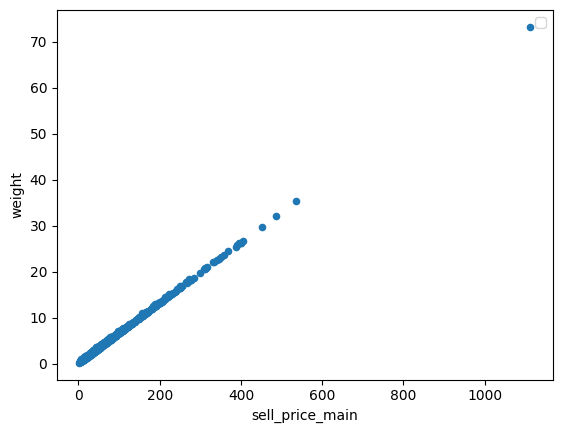

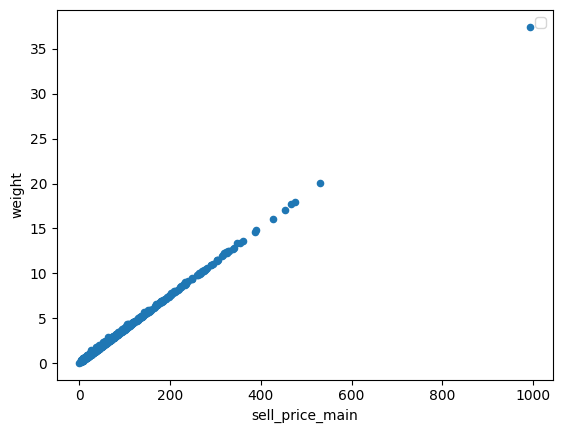

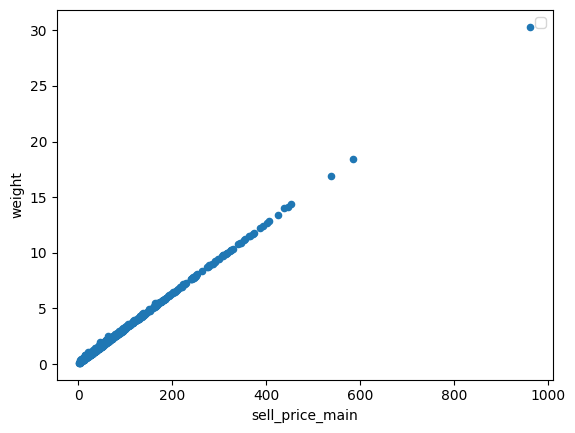

In [ ]:
last.groupby('warehouse').plot(x='sell_price_main', y='weight', kind='scatter')

In [17]:
last['p/w'] = last['sell_price_main'] / last['weight']
last['discount_price'] = last['sell_price_main'] * (1 - last[[f'type_{i}_discount' for i in range(7)]].max(axis=1))

warehouse
Brno_1         Axes(0.125,0.11;0.775x0.77)
Budapest_1     Axes(0.125,0.11;0.775x0.77)
Frankfurt_1    Axes(0.125,0.11;0.775x0.77)
Munich_1       Axes(0.125,0.11;0.775x0.77)
Prague_1       Axes(0.125,0.11;0.775x0.77)
Prague_2       Axes(0.125,0.11;0.775x0.77)
Prague_3       Axes(0.125,0.11;0.775x0.77)
dtype: object

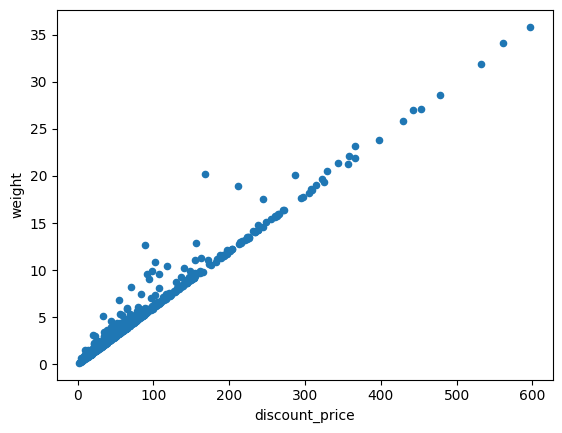

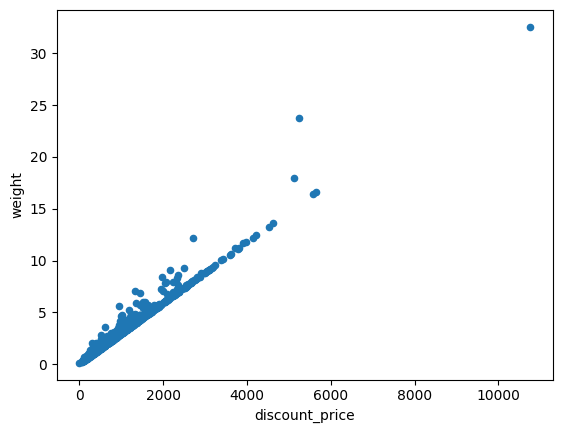

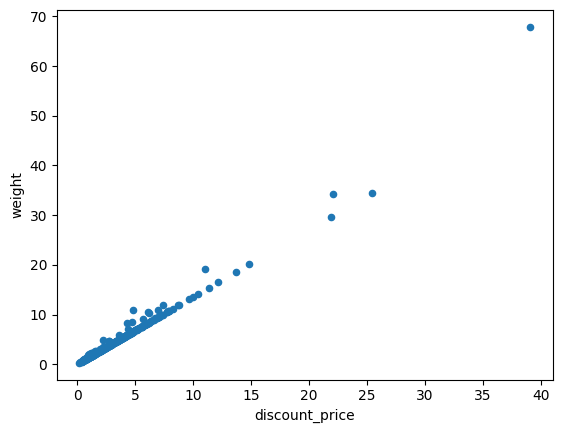

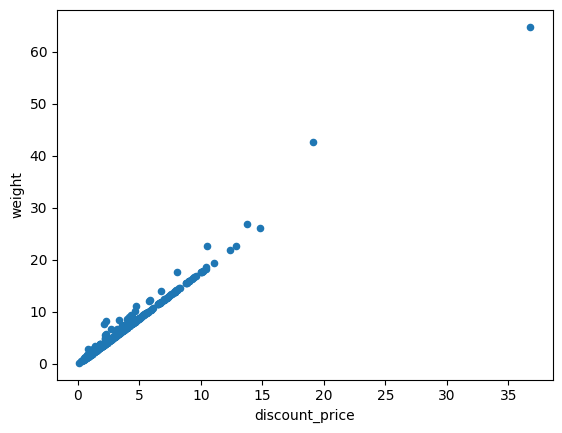

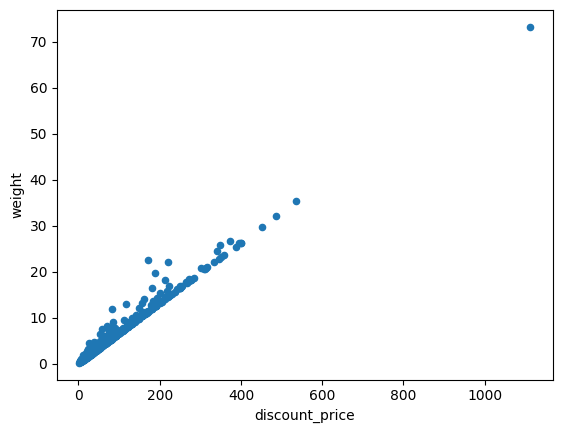

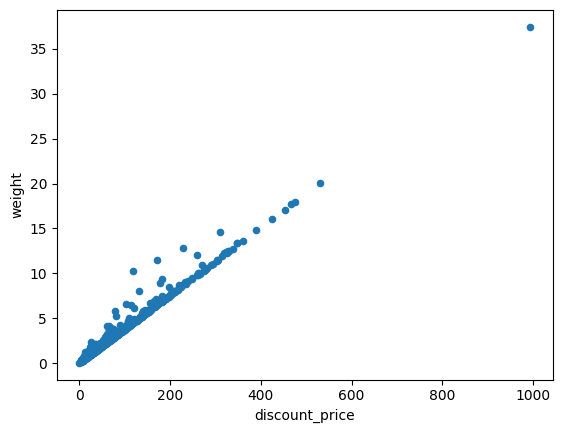

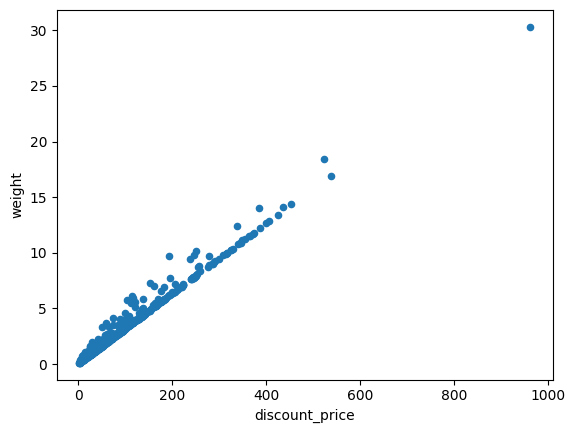

In [20]:
last.groupby('warehouse').plot(x='discount_price', y='weight', kind='scatter')

# Trend

In [28]:
data = data.sort_values(['unique_id', 'date'], axis=0)

<Axes: title={'center': 'Sqrt-Sales-and-Price Plot id=4845'}, xlabel='date'>

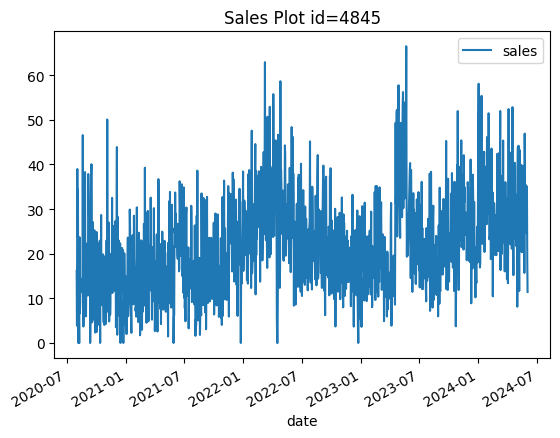

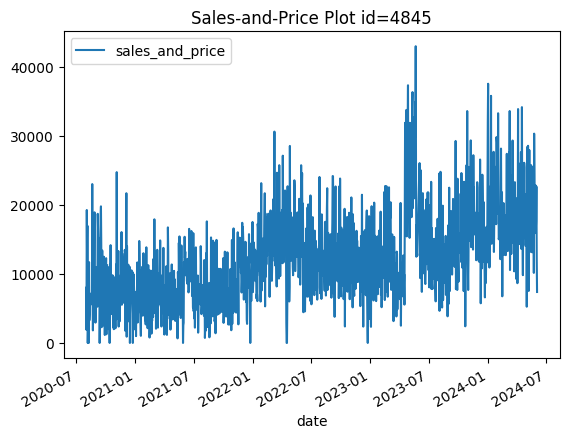

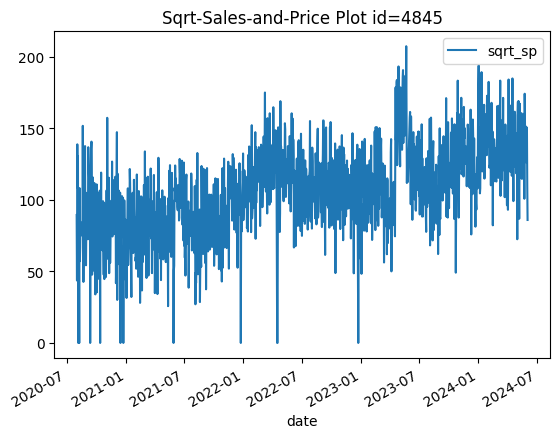

In [29]:
uid = 4845
id = data.loc[data['unique_id'] == uid]
id.plot(x='date', y='sales', title=f'Sales Plot id={uid}')
id.plot(x='date', y='sales_and_price', title=f'Sales-and-Price Plot id={uid}')
id.plot(x='date', y='sqrt_sp', title=f'Sqrt-Sales-and-Price Plot id={uid}')